In [23]:
#import packages

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import random
import pandas as pd
from sympy import symbols, sin, cos, hessian, diff, lambdify, exp, sqrt, pi, E
from scipy.stats import zscore

In [43]:
# Defining simulation parameters
num_simulations = 1000
learning_rate = 0.01
epochs = 1000

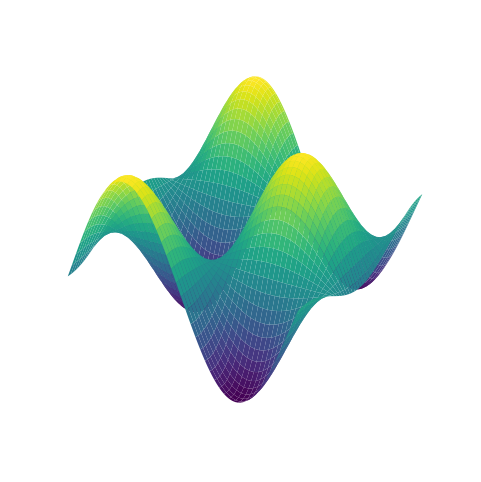

In [75]:
#analysis for function 1: f(x,y) = sin(x/3)*cos(y/3)
#plotting the function

# Define the range of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = np.sin(x/3) * np.cos(y/3)

# Create a 3D plot
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=1)

# Remove gridlines
ax.grid(False)

# Remove background
ax.set_facecolor('white')

# Remove axes
ax.set_axis_off()

# Display the plot
plt.show()

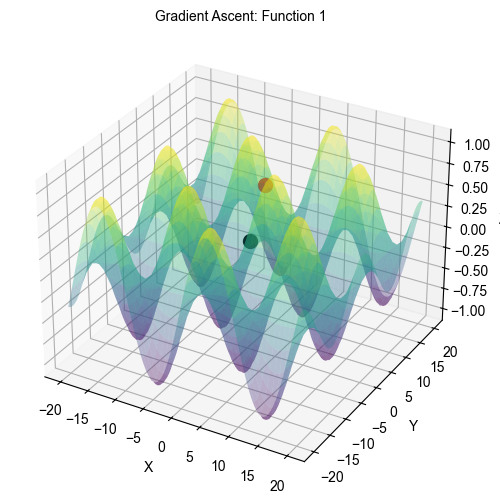

Initial point: x = 0.48, y = 0.11, z = 0.16
Maximum point: x = 3.07, y = 0.06, z = 0.85
Slope at maximum point: (0.17339102457402494, -0.005530052803375133)
Vertical distance travelled: 0.70


In [78]:
#Function 1: running gradient ascent algorithm to find the maximum point of the function

# Parameters
x_start = np.random.normal(0,1)
y_start = np.random.normal(0,1)

# Define the function
def f1(x, y):
    return np.sin(x/3) * np.cos(y/3)

# Define the gradients of the function
def grad_f1(x=x_start, y=y_start):
    df_dx = 1/3 * np.cos(x/3) * np.cos(y/3)
    df_dy = -1/3 * np.sin(x/3) * np.sin(y/3)
    return df_dx, df_dy

# Gradient ascent algorithm
def gradient_ascent(x_start, y_start, learning_rate, epochs, grad):
    x = x_start
    y = y_start
    for _ in range(epochs):
        grad_x, grad_y = grad(x, y)
        x += learning_rate * grad_x  # move in the direction of the gradient
        y += learning_rate * grad_y
    return x, y


# Run gradient ascent
x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs, grad=grad_f1)

# Define the range of x and y values
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = np.sin(x/3) * np.cos(y/3)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.35)

# Overlay the starting point
z_start = f1(x_start, y_start)
ax.scatter(x_start, y_start, z_start, color='k', s=100)  # s is the size of the point

# Overlay the maximum point
z_max = f1(x_max, y_max)
ax.scatter(x_max, y_max, z_max, color='r', s=100)  # s is the size of the point

# Set labels and title
font_dict = {'fontsize': 10, 'fontname': 'Arial'}
ax.set_xlabel('X', fontdict=font_dict)
ax.set_ylabel('Y', fontdict=font_dict)
ax.set_zlabel('Z', fontdict=font_dict)
ax.set_title('Gradient Ascent: Function 1', fontdict=font_dict)

# Display the plot
plt.show()
print(f"Initial point: x = {x_start:.2f}, y = {y_start:.2f}, z = {z_start:.2f}")
print(f"Maximum point: x = {x_max:.2f}, y = {y_max:.2f}, z = {z_max:.2f}")
print(f"Slope at maximum point: {(grad_f1(x_max, y_max))}")
print(f"Vertical distance travelled: {(z_max - z_start):.2f}")

/var/folders/lm/ht15fnhx0j9bcx93t1l385680000gn/T/ipykernel_20578/3383845058.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)


           z_start        z_max       z_diff
count  1000.000000  1000.000000  1000.000000
mean      0.009330     0.736788     0.727458
std       0.294945     0.172167     0.169850
min      -0.845161    -0.359098     0.151517
25%      -0.180696     0.667563     0.607216
50%       0.008269     0.776441     0.745531
75%       0.218595     0.856176     0.863331
max       0.827692     0.979209     1.009212




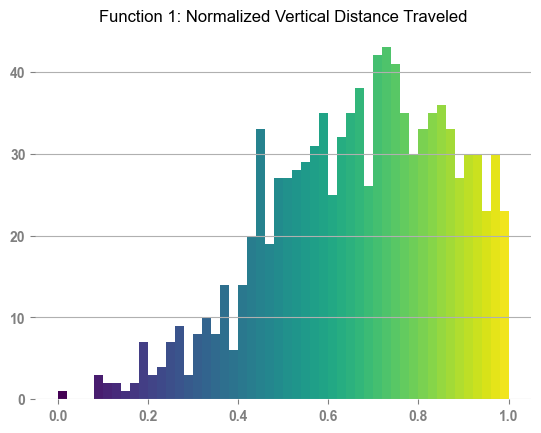

In [81]:
#Function 1: creating a histogram to check for the convergence of the gradient ascent algorithm

# Create an empty dataframe to store the simulation data
simulation_data = pd.DataFrame(columns=['z_start','z_max', 'z_diff'])

# Perform the simulations
for _ in range(num_simulations):
    # Generate random starting coordinates
    x_start = np.random.normal(0, 1)
    y_start = np.random.normal(0, 1)
    
    # Perform the gradient ascent algorithm and obtain the maximum point
    x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs, grad=grad_f1)
    
    # Calculate the difference between the maximum and starting z values
    z_start = f1(x_start, y_start)
    z_max = f1(x_max, y_max)
    z_diff = z_max - z_start

    # Create a new DataFrame with the data for this simulation
    new_data = pd.DataFrame([{'z_start': z_start, 'z_max': z_max, 'z_diff': z_diff}])

    # Concatenate the new data to the simulation_data DataFrame
    simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)

print(simulation_data.describe())
print("\n")

#plotting a histogram for normalized z_diff

data = (simulation_data["z_diff"] - simulation_data["z_diff"].min()) / (simulation_data["z_diff"].max() - simulation_data["z_diff"].min())

# Set the font properties
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# Create a colormap
cmap = plt.get_cmap('viridis')

# Create a normalized color map
norm = plt.Normalize(data.min(), data.max())

# Create a figure and a histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=50)

# Color code the histogram to match with the color scheme in cmap = "viridis"
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cmap(norm(bins[i])))

# Add y-axis gridlines
ax.grid(True, axis='y')

# Remove the box around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Change the color of the x and y axis ticks to a darker grey and make them bold
ax.tick_params(colors='grey')
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

plt.title('Function 1: Normalized Vertical Distance Traveled', fontsize=12)

plt.show()


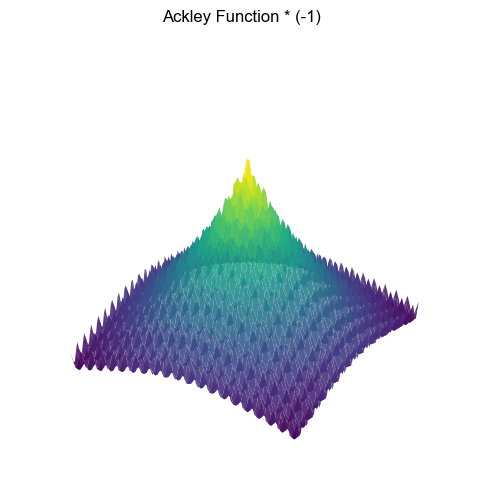

In [83]:
#analysis for function 1: negative of ackley function (https://www.sfu.ca/~ssurjano/ackley.html)
#plotting the function

def f2(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c*x) + np.cos(c*y)))
    return (term1 + term2 + a + np.exp(1))*-1

# Create a meshgrid of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculate the Z values using the Ackley function
Z = f2(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))  
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

# Remove gridlines
ax.grid(False)

# Remove background
ax.set_facecolor('white')

# Remove axes
ax.set_axis_off()

plt.title('Ackley Function * (-1)', fontsize=12)
# Show the plot
plt.show()

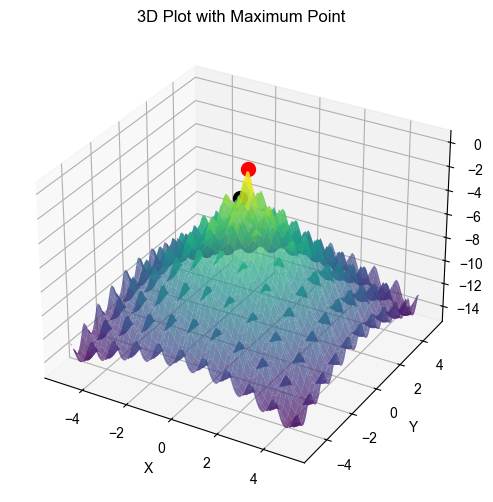

Initial point: x = -0.17, y = -0.25, z = -2.27
Maximum point: x = 0.01, y = 0.01, z = -0.06
Slope at maximum point: (-2.4863620133697535, -2.9369392136430976)
Vertical distance traveled: 2.21


In [48]:
#Function 2: running gradient ascent algorithm to find the maximum point of the function
# Define the function

def f2(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c*x) + np.cos(c*y)))
    return (term1 + term2 + a + np.exp(1))*-1

# Define the gradients of the function
def grad_f2(x=x_start, y=y_start):
    # Define the symbols
    a, b = symbols('a b')
    
    # Define the function
    z = (-20 * exp(-0.2 * sqrt(0.5 * (a**2 + b**2))) - exp(0.5 * (cos(2 * pi * a) + cos(2 * pi * b))) + E + 20) * -1
    
    # Compute the gradients of the function
    grad_x = lambdify((a, b), diff(z, a), 'numpy')
    grad_y = lambdify((a, b), diff(z, b), 'numpy')
    df_dx = grad_x(x, y)
    df_dy = grad_y(x, y)
    
    return df_dx, df_dy

# Parameters
x_start = np.random.normal(0, 1)
y_start = np.random.normal(0, 1)

# Run gradient ascent
x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs, grad=grad_f2)

# Define the range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Define the function for the z values
z = f2(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.7)

# Overlay the starting point
z_start = f2(x_start, y_start)
ax.scatter(x_start, y_start, z_start, color='k', s=100)  # s is the size of the point

# Overlay the maximum point
z_max = f2(x_max, y_max)
ax.scatter(x_max, y_max, z_max, color='r', s=100)  # s is the size of the point

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot with Maximum Point')

# Display the plot
plt.show()
print(f"Initial point: x = {x_start:.2f}, y = {y_start:.2f}, z = {z_start:.2f}")
print(f"Maximum point: x = {x_max:.2f}, y = {y_max:.2f}, z = {z_max:.2f}")
print(f"Slope at maximum point: {(grad_f2(x_max, y_max))}")
print(f"Vertical distance traveled: {(z_max - z_start):.2f}")

/var/folders/lm/ht15fnhx0j9bcx93t1l385680000gn/T/ipykernel_20578/2388567088.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)


           z_start        z_max       z_diff
count  1000.000000  1000.000000  1000.000000
mean     -4.830691    -2.795442     2.035249
std       1.604155     1.809799     1.161194
min     -10.154860    -7.961711     0.002711
25%      -6.019119    -3.574452     1.073624
50%      -4.537769    -2.579928     1.885032
75%      -3.697595    -2.579928     3.016153
max      -0.082290    -0.064216     4.536860




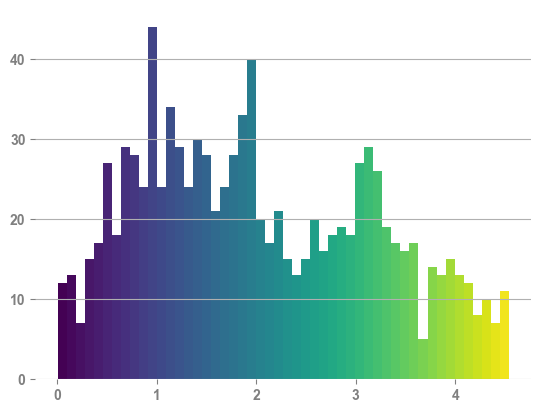

In [49]:
#Function 2: creating a histogram to check for the convergence of the gradient ascent algorithm

# Create an empty dataframe to store the simulation data
simulation_data = pd.DataFrame(columns=['z_start','z_max', 'z_diff'])

# Perform the simulations
for _ in range(num_simulations):
    # Generate random starting coordinates
    x_start = np.random.normal(0, 1)
    y_start = np.random.normal(0, 1)
    
    # Perform the gradient ascent algorithm and obtain the maximum point
    x_max, y_max = gradient_ascent(x_start, y_start, learning_rate, epochs, grad=grad_f2)
    
    # Calculate the difference between the maximum and starting z values
    z_start = f2(x_start, y_start)
    z_max = f2(x_max, y_max)
    z_diff = z_max - z_start

    # Create a new DataFrame with the data for this simulation
    new_data = pd.DataFrame([{'z_start': z_start, 'z_max': z_max, 'z_diff': z_diff}])

    # Concatenate the new data to the simulation_data DataFrame
    simulation_data = pd.concat([simulation_data, new_data], ignore_index=True)

print(simulation_data.describe())
print("\n")

#plotting a histogram for z_diff
data = (simulation_data["z_diff"] - simulation_data["z_diff"].min()) / (simulation_data["z_diff"].max() - simulation_data["z_diff"].min())

# Set the font properties
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# Create a colormap
cmap = plt.get_cmap('viridis')

# Create a normalized color map
norm = plt.Normalize(data.min(), data.max())

# Create a figure and a histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=50)

# Color code the histogram to match with the color scheme in cmap = "viridis"
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cmap(norm(bins[i])))

# Add y-axis gridlines
ax.grid(True, axis='y')

# Remove the box around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Change the color of the x and y axis ticks to a darker grey and make them bold
ax.tick_params(colors='grey')
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()